In [1]:
import pandas as pd
import numpy as np
import missingno as msno

### Đọc dữ liệu 

In [2]:
raw_df = pd.read_csv('./Data/DSPhongTro.csv', sep='\t')

In [3]:
#Test
raw_df.head()

,ID,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Link,Ngày đăng tin
0,39738459.0,"1155/51/20, Đường Tỉnh lộ 43, Phường Bình Chiể...",40.0,NaN,NaN,Không,2.8,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,21/10/2024
1,40588265.0,"Đường 3/2, Phường 11, Quận 10, Hồ Chí Minh",20.0,NaN,NaN,Không,4.0,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,18/10/2024
2,41251164.0,"Số 5/1, Đường Tống Văn Hên, Phường 15, Tân Bìn...",25.0,NaN,NaN,Không,4.5,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,18/10/2024
3,41278673.0,"Đường Cù Chính Lan, Phường 13, Tân Bình, Hồ Ch...",20.0,1.0,1.0,Đầy đủ.,4.0,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,22/10/2024
4,41290558.0,"Đường Ngô Bệ, Phường 13, Tân Bình, Hồ Chí Minh",60.0,2.0,2.0,Không,10.0,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,23/10/2024


### Xử lí dòng bị thiếu dữ liệu

In [4]:
raw_df.isna().sum()

ID                  3
Địa chỉ             3
Diện tích           3
Số phòng ngủ     4114
Số toilet        3782
Nội thất            0
Mức giá            10
Link                0
Ngày đăng tin       3
dtype: int64

<Axes: >

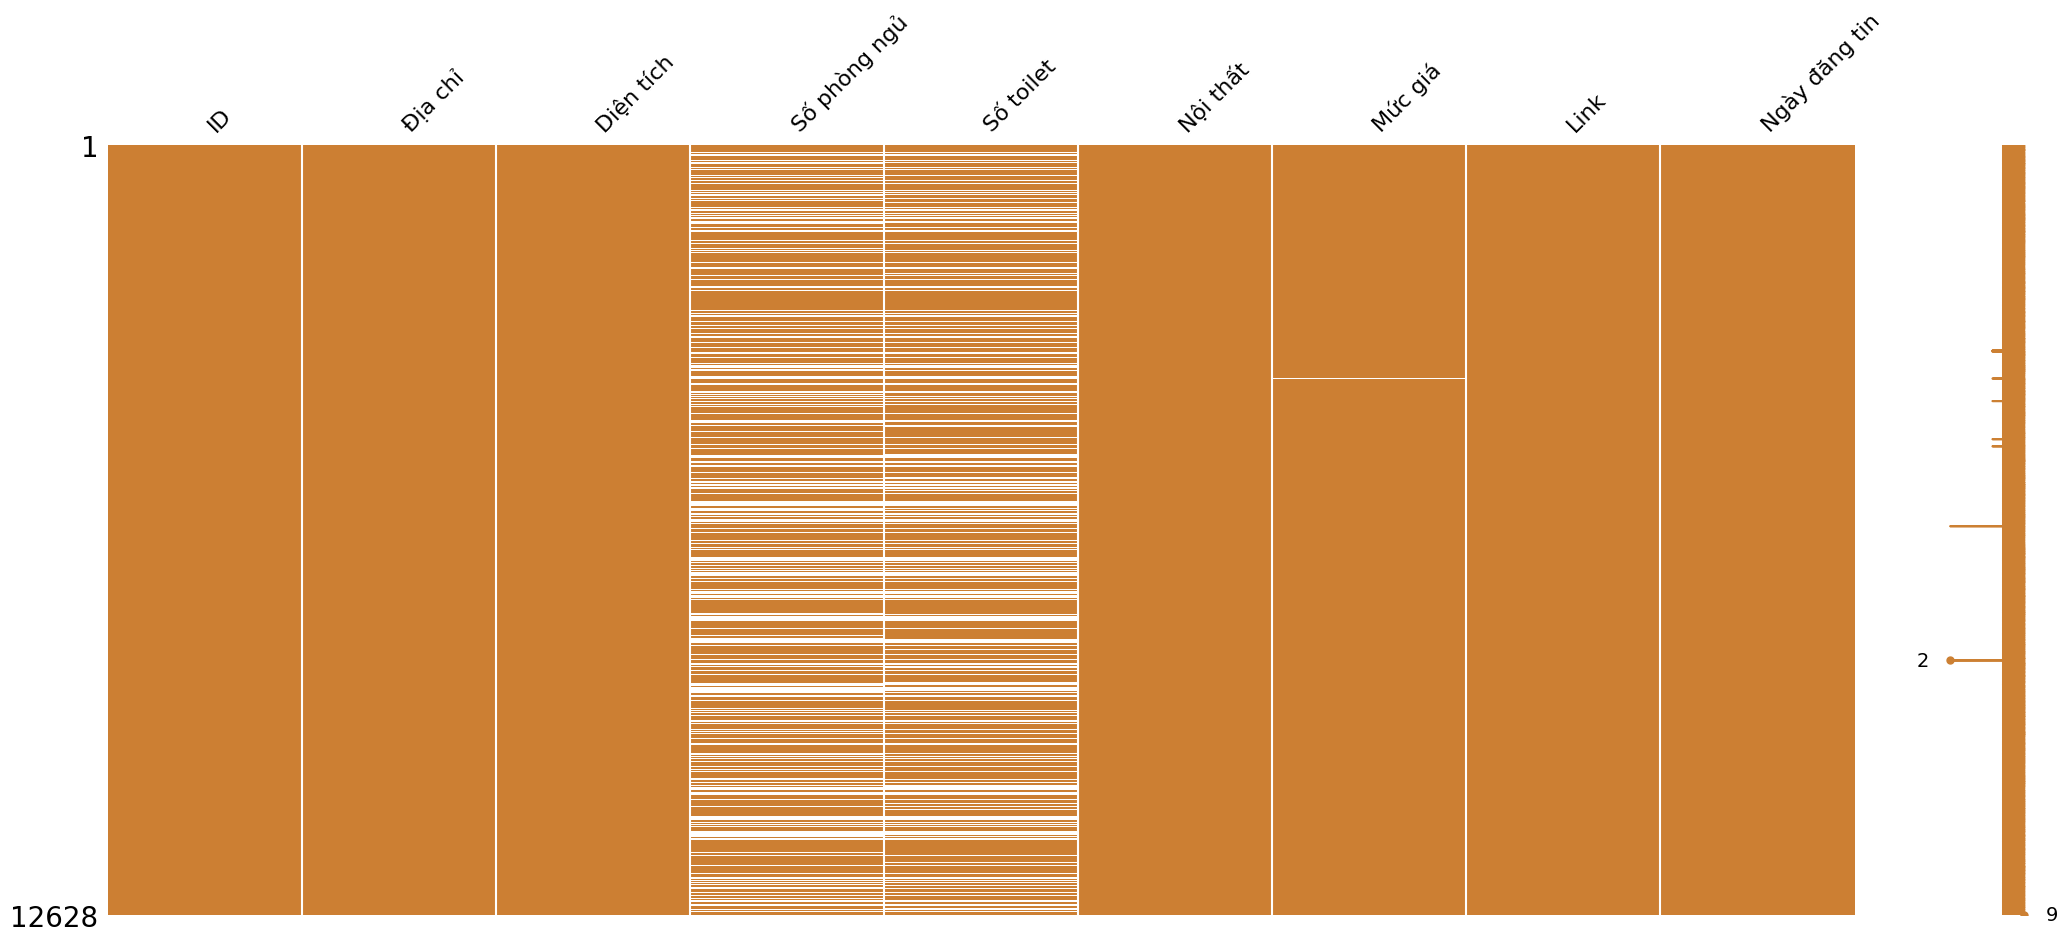

In [5]:
#Trực quan hóa dữ liệu bị thiếu
msno.matrix(raw_df, color=(0.8, 0.5, 0.2))

- Từ biểu đồ chúng ta có thể thấy 2 cột 'Số phòng ngủ' và 'Số toilet' có tỉ lệ thiếu dữ liệu khá lớn => Chúng ta sẽ loại bỏ các dòng bị thiếu dữ liệu để tránh việc nó ảnh hưởng đến kết quả phân tích sau này.
- Còn một số cột khác cũng bị thiếu dữ liệu nhưng rất ít => chúng ta cũng có thể bỏ những dòng này mà không sợ ảnh hưởng đến kết quả sau này.

In [6]:
raw_df = raw_df.dropna(subset=['ID', 'Địa chỉ', 'Diện tích', 'Mức giá', 'Ngày đăng tin', 'Số phòng ngủ', 'Số toilet'])

In [7]:
#Test
raw_df.isna().sum()

ID               0
Địa chỉ          0
Diện tích        0
Số phòng ngủ     0
Số toilet        0
Nội thất         0
Mức giá          0
Link             0
Ngày đăng tin    0
dtype: int64

### Xử lí trùng lắp dữ liệu

In [8]:
#Test
print(f'Số lượng dòng dữ liệu bị trùng lặp: {raw_df.duplicated().sum()}')

Số lượng dòng dữ liệu bị trùng lặp: 3478


In [9]:
#Loại bỏ dòng trùng lắp
raw_df.drop_duplicates(inplace=True)

In [10]:
#Test
print(f'Số lượng dòng dữ liệu bị trùng lặp sau khi xử lý: {raw_df.duplicated().sum()}')

Số lượng dòng dữ liệu bị trùng lặp sau khi xử lý: 0


### Loại bỏ các dòng có giá trị bất thường

In [11]:
raw_df.shape

(4839, 9)

In [12]:
raw_df.dtypes

ID               float64
Địa chỉ           object
Diện tích        float64
Số phòng ngủ     float64
Số toilet        float64
Nội thất          object
Mức giá           object
Link              object
Ngày đăng tin     object
dtype: object

- Chúng ta có thể thấy cột 'Mức giá' đáng lẽ ra phải có kiểu dữ liệu là float nhưng ở đây cột 'Mức giá' lại có kiểu object => Chúng ta cần kiểm tra các giá trị trong cột 'Mức giá'

In [13]:
#Kiểm tra các giá trị của cột mức giá
raw_df['Mức giá'].unique()

array(['4.0', '10.0', '7.3', '4.1', '2.8', '4.8', '3.4', '7.7', '4.5',
       '3.2', '3.6', '6.0', '3.5', '3.8', '8.5', '5.0', '4.4', '7.6',
       '3.7', '4.9', '5.4', '5.9', '6.5', '4.7', '2.5', '3.3', '7.0',
       '1.5', '1.2', '5.6', '5.8', '5.2', '9.5', '6.4', '3.0', '3.9',
       '3.45', '11.0', '5.5', '1.9', '8.0', '4.2', '6.6', '4.3', '7.2',
       '4.6', '7.5', '9.0', '6.8', '2.9', '2.6', '1.19', '1.09', '6.2',
       'Thỏa thuận', '2.7', '5.7', '5.1', '8.9', '6.7', '4.75', '6.9',
       '11.5', '5.3', '8.8', '13.0', '5.55', '6.3', '1.4', '3.95', '1.8',
       '1.65', '8.7', '8.3', '1.0', '2.2', '3.1', '7.4', '2.99', '13.5',
       '6.1', '16.0', '2.3', '9.2', '2.0', '7.8', '12.0', '7.9', '9.8',
       '1.95', '1.6', '10.5', '15.0', '4.95', '9.3', '1.32', '14.0',
       '1.7', '9.4', '10.9', '2.4', '11.3', '8.4', '2.1', '1.39', '4.45',
       '1.75', '1.35', '2.45', '8.6', '1.3', '9.9', '1.1', '3.55', '28.0',
       '8.49', '650.0', '12.2', '900.0', '1.15', '1.78', '18.0', '4

- Chúng ta có thể thấy có giá trị bất thường là  'Thỏa thuận' ở trong cột 'Mức giá' => bỏ những dòng có giá trị này

In [14]:
raw_df = raw_df[raw_df['Mức giá'] != 'Thỏa thuận'].reset_index(drop=True) #bỏ những dòng nào có giá là 'thỏa thuận'

In [15]:
#Test
raw_df['Mức giá'].unique()

array(['4.0', '10.0', '7.3', '4.1', '2.8', '4.8', '3.4', '7.7', '4.5',
       '3.2', '3.6', '6.0', '3.5', '3.8', '8.5', '5.0', '4.4', '7.6',
       '3.7', '4.9', '5.4', '5.9', '6.5', '4.7', '2.5', '3.3', '7.0',
       '1.5', '1.2', '5.6', '5.8', '5.2', '9.5', '6.4', '3.0', '3.9',
       '3.45', '11.0', '5.5', '1.9', '8.0', '4.2', '6.6', '4.3', '7.2',
       '4.6', '7.5', '9.0', '6.8', '2.9', '2.6', '1.19', '1.09', '6.2',
       '2.7', '5.7', '5.1', '8.9', '6.7', '4.75', '6.9', '11.5', '5.3',
       '8.8', '13.0', '5.55', '6.3', '1.4', '3.95', '1.8', '1.65', '8.7',
       '8.3', '1.0', '2.2', '3.1', '7.4', '2.99', '13.5', '6.1', '16.0',
       '2.3', '9.2', '2.0', '7.8', '12.0', '7.9', '9.8', '1.95', '1.6',
       '10.5', '15.0', '4.95', '9.3', '1.32', '14.0', '1.7', '9.4',
       '10.9', '2.4', '11.3', '8.4', '2.1', '1.39', '4.45', '1.75',
       '1.35', '2.45', '8.6', '1.3', '9.9', '1.1', '3.55', '28.0', '8.49',
       '650.0', '12.2', '900.0', '1.15', '1.78', '18.0', '4.99', '999.0',

### Chuẩn hóa cột địa chỉ và nội thất

In [16]:
raw_df[['Địa chỉ', 'Nội thất']]

,Địa chỉ,Nội thất
0,"Đường Cù Chính Lan, Phường 13, Tân Bình, Hồ Ch...",Đầy đủ.
1,"Đường Ngô Bệ, Phường 13, Tân Bình, Hồ Chí Minh",Không
2,"Đường Nam Kỳ Khởi Nghĩa, Phường Võ Thị Sáu, Qu...",Không
3,"Đường Lê Văn Thịnh, Phường Bình Trưng Tây, Quậ...",Đầy đủ
4,"Đường Hiệp Bình, Phường Hiệp Bình Phước, Thủ Đ...",Không nội thất
...,...,...
4809,"Đường Thạnh Xuân 48, Phường Thạnh Xuân, Quận 1...",Không
4810,"Đường Đông Hưng Thuận 5, Phường Đông Hưng Thuậ...",Không
4811,"Đường Trần Hữu Trang, Phường 11, Phú Nhuận, Hồ...",Đầy đủ
4812,"Đường 339, Phường Phước Long B, Thủ Đức, Hồ Ch...",Đầy đủ


In [17]:
#chuyển địa chỉ thành số
def district_to_number(address, districts):
    for district, value in districts.items():
        if district in address:
            return value
    return 0

districts = pd.read_csv('./Data/address.txt', sep=':', header=None)
districts = districts.set_index(0)[1].to_dict()

raw_df['Địa chỉ'] = raw_df['Địa chỉ'].apply(lambda x: district_to_number(x, districts))

In [18]:
#chuyển nội thất thành số
def furniture_to_number(furniture, dict_furniture):
    for fur, value in dict_furniture.items():
        if fur.lower() in furniture.lower():
            return value
    return 2

dict_furniture = pd.read_csv('./Data/furniture.txt', sep=':', header=None).set_index(0)[1].to_dict()

raw_df['Nội thất'] = raw_df['Nội thất'].apply(lambda x: furniture_to_number(x, dict_furniture))

### Xử lý các dòng không có địa chỉ

In [19]:
raw_df = raw_df[raw_df['Địa chỉ'] != 0]

### Xoá cột link vì không giúp ích nhiều cho phân tích

In [ ]:
raw_df = raw_df.drop('Link', axis=1)

In [20]:
#Test
raw_df[['Địa chỉ', 'Nội thất']]

,Địa chỉ,Nội thất
0,14,2
1,14,0
2,3,0
4,17,0
5,1,2
...,...,...
4809,1,0
4810,1,0
4811,13,2
4812,17,2


### Chỉnh sửa kiểu dữ liệu cho từng cột

In [21]:
raw_df.dtypes

ID               float64
Địa chỉ            int64
Diện tích        float64
Số phòng ngủ     float64
Số toilet        float64
Nội thất           int64
Mức giá           object
Link              object
Ngày đăng tin     object
dtype: object

In [22]:
raw_df['ID'] = raw_df['ID'].astype('category')
raw_df['Mức giá'] = raw_df['Mức giá'].astype(np.float64)
raw_df['Ngày đăng tin'] = pd.to_datetime(raw_df['Ngày đăng tin'], format='%d/%m/%Y')
raw_df['Địa chỉ'] = raw_df['Địa chỉ'].astype('category')
raw_df['Nội thất'] = raw_df['Nội thất'].astype('category')

In [23]:
#Test
raw_df.dtypes

ID                     category
Địa chỉ                category
Diện tích               float64
Số phòng ngủ            float64
Số toilet               float64
Nội thất               category
Mức giá                 float64
Link                     object
Ngày đăng tin    datetime64[ns]
dtype: object

### Lưu dữ liệu đã xử lí

In [24]:
#Lưu dữ liệu đã xử lý vào file csv
raw_df.to_csv('./Data/DSPhongTro_DaXuLy.csv', encoding='utf-8-sig', header=True, sep='\t', index=False)